In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [11]:
data = pd.read_csv('Week7_train.csv')  # Replace with your dataset's file name


In [12]:
print(data.shape)


(42000, 785)


In [13]:
sampled_data = data.sample(frac=0.1, random_state=42)


In [14]:
print(sampled_data.shape)


(4200, 785)


In [15]:
print(sampled_data.head())


       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
5457       8       0       0       0       0       0       0       0       0   
38509      1       0       0       0       0       0       0       0       0   
25536      9       0       0       0       0       0       0       0       0   
31803      9       0       0       0       0       0       0       0       0   
39863      8       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
5457        0  ...         0         0         0         0         0   
38509       0  ...         0         0         0         0         0   
25536       0  ...         0         0         0         0         0   
31803       0  ...         0         0         0         0         0   
39863       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
5457          0         0   

In [16]:
print(sampled_data['label'].nunique())  # Replace 'class_label' with the actual column name


10


In [17]:
print(sampled_data['label'].value_counts())  # Replace 'class_label' accordingly


label
3    506
1    471
7    438
2    420
9    416
0    408
8    403
6    402
4    397
5    339
Name: count, dtype: int64


In [19]:
X = sampled_data.drop('label', axis=1)  # Replace 'class_label' with the target column
y = sampled_data['label']


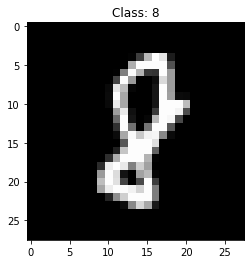

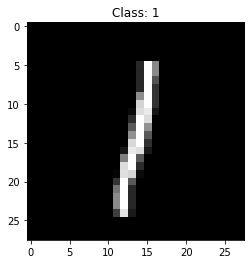

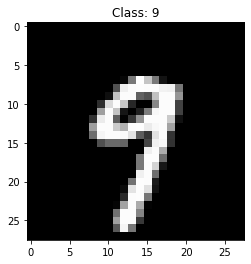

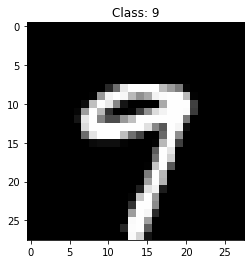

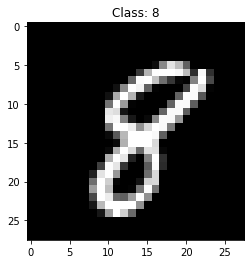

In [20]:
for i in range(5):
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')  # Adjust shape if needed
    plt.title(f"Class: {y.iloc[i]}")
    plt.show()


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [22]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [23]:
y_pred = knn.predict(X_test)


In [24]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 97   0   0   1   0   1   2   0   0   0]
 [  0 118   0   0   0   0   0   0   0   0]
 [  0   6  81   0   0   0   0   3   0   0]
 [  0   0   1 122   0   4   0   1   1   3]
 [  0   0   0   0  88   0   2   0   0   5]
 [  0   1   0   2   0  80   1   1   0   0]
 [  0   1   0   0   0   0  98   0   0   0]
 [  0   9   1   0   0   0   0 104   0   4]
 [  0   5   1   3   0   1   2   2  89   3]
 [  1   2   0   1   3   0   0   5   0  94]]


In [25]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       101
           1       0.83      1.00      0.91       118
           2       0.96      0.90      0.93        90
           3       0.95      0.92      0.93       132
           4       0.97      0.93      0.95        95
           5       0.93      0.94      0.94        85
           6       0.93      0.99      0.96        99
           7       0.90      0.88      0.89       118
           8       0.99      0.84      0.91       106
           9       0.86      0.89      0.87       106

    accuracy                           0.92      1050
   macro avg       0.93      0.92      0.93      1050
weighted avg       0.93      0.92      0.92      1050



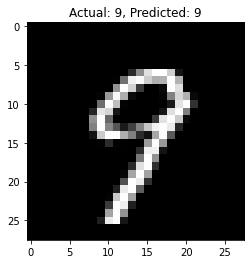

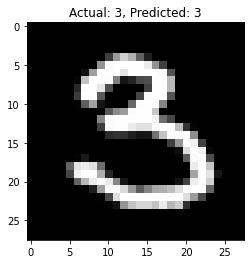

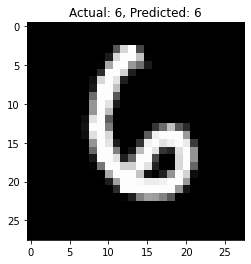

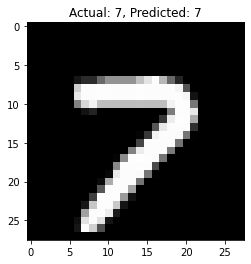

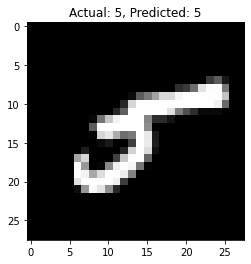

In [26]:
for i in range(5):
    plt.imshow(X_test.iloc[i].values.reshape(28, 28), cmap='gray')  # Adjust shape if needed
    plt.title(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")
    plt.show()
